In [1]:

using Plots
using CSV # Análisis de datos, importar y exportar
using DataFrames 

using Interpolations # Interpolación para congruencia en la comparación de datos


**Importación de los archivos**

In [2]:
df_n = CSV.read("c_normal.csv", DataFrame);
df_g = CSV.read("c_grueso.csv", DataFrame);
df_f = CSV.read("c_fino.csv", DataFrame);

#Se recuperan los datos de los nombre, transformandolos a una variable Float64
t_n = parse.(Float64, names(df_n)); 
t_g = parse.(Float64, names(df_g));
t_f = parse.(Float64, names(df_f));

In [3]:
function interp(df,t,x)
    # df: DataFrame 
    # t: Arreglo de tiempo correspondiente al nombre de las columnas del DataFrame
    # x: Tiempo requerido

    i = findfirst(u -> u > x, t) #Encontrar el indice para el tiempo requerido
    y = zeros(length(df[:,1])) #Se inicializa el vector interpolado  

    for j in 1:length(y)
        #y[j] = (1 - (x - t[i-1]) / (t[i] - t[i-1])) * df[j, i-1] +
            #((x - t[i-1]) / (t[i] - t[i-1])) * df[j, i]

        yj = collect(df[j,:]) # Transformar fila j en un array
        LI = linear_interpolation(t, yj) # Interpolar la fila j
        y[j] = LI(x) # Se evalua la intepolación en el tiempo requerido
    end

    return y
end

interp (generic function with 1 method)

**Interpolación para los 3 tipos de malla en dos tiempos de interés**

In [4]:
# Tiempo 1
t1 = 3600*15
c1_n = interp(df_n,t_n,t1); # Malla normal
c1_g = interp(df_g,t_g,t1); # Malla gruesa
c1_f = interp(df_f,t_f,t1); # Malla fina

# Tiempo 2
t2 = 3600*70
c2_n = interp(df_n,t_n,t2); # Malla normal
c2_g = interp(df_g,t_g,t2); # Malla gruesa
c2_f = interp(df_f,t_f,t2); # Malla fina

**Creación de arreglo para largo del lecho**

In [5]:
# El rango de cada vector es el mismo, sin embargo se diferencian en la cantidad de componentes
n = range(0,0.2,length(c1_n));
g = range(0,0.2,length(c1_g));
f = range(0,0.2,length(c1_f));

**Gráfico comparativo**

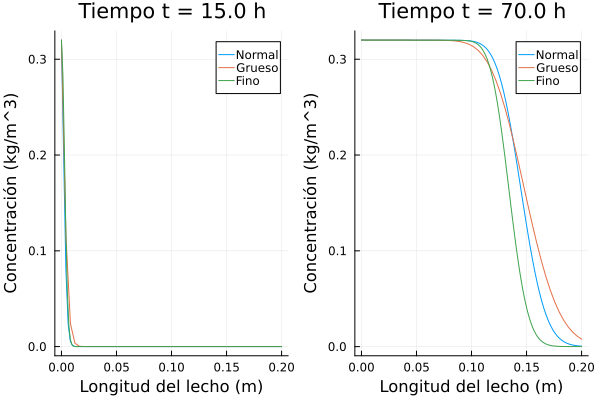

In [6]:
# Creación de subplot
l = @layout [a b]

# Gráfico para tiempo 1
l1 = plot(n, c1_n, label="Normal")
plot!(l1, g, c1_g, label="Grueso")
plot!(l1, f, c1_f, label="Fino")
xlabel!(l1, "Longitud del lecho (m)")
ylabel!(l1, "Concentración (kg/m^3)")
title!(l1, "Tiempo t = $(t1/3600) h")

# Gráfico para tiempo 2
l2 = plot(n, c2_n, label="Normal")
plot!(l2, g, c2_g, label="Grueso")
plot!(l2, f, c2_f, label="Fino")
xlabel!(l2, "Longitud del lecho (m)")
ylabel!(l2, "Concentración (kg/m^3)")
title!(l2, "Tiempo t = $(t2/3600) h")

P = plot(l1, l2; layout=l)
#savefig(P, "GRID.pdf")

**Determinación de Average Media Desviation**

**Tiempo 1**

In [12]:
#Comparación malla normal-gruesa
LI_g1 = LinearInterpolation(g, c1_g) 

c1_gLI = LI_g1.(n)

dif1g = abs.(c1_n - c1_gLI)
max_1g = maximum(dif1g)

amd1g = sum(dif1g)/length(n) #  Cálculo de AMD
println("AMD grueso = ", round(amd1g*100, digits=4), "%")
println("Máxima desviación (Grueso) = ", round(max_1g, digits=4))



#Comparación malla normal-fina
LI_f1 = LinearInterpolation(f, c1_f) 

c1_fLI = LI_f1.(n)

dif1f = abs.(c1_n - c1_fLI)
max_1f = maximum(dif1f)

amd1f = sum(dif1f)/length(n) #  Cálculo de AMD
println("AMD fino = ", round(amd1f*100, digits=4), "%")
println("Máxima desviación (Fino) = ", round(max_1f, digits=4))


AMD grueso = 0.1455%
Máxima desviación (Grueso) = 0.0473
AMD fino = 0.1001%
Máxima desviación (Fino) = 0.0453


**Tiempo 2**

In [13]:
#Comparación malla normal-gruesa
LI_g2 = LinearInterpolation(g, c2_g) 

c2_gLI = LI_g2.(n)

dif2g = abs.(c2_n - c2_gLI)
max_2g = maximum(dif2g)

amd2g = sum(dif2g)/length(n) #  Cálculo de AMD
println("AMD grueso = ", round(amd2g*100, digits=4), "%")
println("Máxima desviación (Grueso) = ", round(max_2g, digits=4))



#Comparación malla normal-fina
LI_f2 = LinearInterpolation(f, c2_f) 

c2_fLI = LI_f2.(n)

dif2f = abs.(c2_n - c2_fLI)
max_2f = maximum(dif1f)

amd2f = sum(dif2f)/length(n) #  Cálculo de AMD
println("AMD fino = ", round(amd2f*100, digits=4), "%")
println("Máxima desviación (Fino) = ", round(max_2f, digits=4))

AMD grueso = 1.0002%
Máxima desviación (Grueso) = 0.0407
AMD fino = 1.7643%
Máxima desviación (Fino) = 0.0453
